## Problema: Fazer a previsão do risco de acidente de veículo, a partir dos dados das pessoas contratantes do seguro e dos dados do veículo segurado

In [ ]:
#imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/insurance.csv')
df.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [ ]:
#Excluindo coluna 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])
df.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GoodStudent   20000 non-null  bool  
 1   Age           20000 non-null  object
 2   SocioEcon     20000 non-null  object
 3   RiskAversion  20000 non-null  object
 4   VehicleYear   20000 non-null  object
 5   ThisCarDam    20000 non-null  object
 6   RuggedAuto    20000 non-null  object
 7   Accident      20000 non-null  object
 8   MakeModel     20000 non-null  object
 9   DrivQuality   20000 non-null  object
 10  Mileage       20000 non-null  object
 11  Antilock      20000 non-null  bool  
 12  DrivingSkill  20000 non-null  object
 13  SeniorTrain   20000 non-null  bool  
 14  ThisCarCost   20000 non-null  object
 15  Theft         20000 non-null  bool  
 16  CarValue      20000 non-null  object
 17  HomeBase      20000 non-null  object
 18  AntiTheft     20000 non-null  bool  
 19  Prop

In [ ]:
# Número de linhas e colunas

df.shape

(20000, 27)

In [ ]:
# Verificando valores únicos para a coluna 'Accident'
# Essa coluna informa o risco de sofrer acidente, ou seja, são as classes que queremos prever

df.Accident.unique()

array(['Mild', 'None', 'Moderate', 'Severe'], dtype=object)

Separando as variáveis da classe:

In [ ]:
X = df.drop(columns = ['Accident'])
Y = df['Accident']

Colocando no formato do numpy:

In [ ]:
X = X.iloc[:,:].values
print(X)

[[False 'Adult' 'Prole' ... False 'Thousand' 'Many']
 [False 'Senior' 'Prole' ... True 'Thousand' 'Zero']
 [False 'Senior' 'UpperMiddle' ... True 'Thousand' 'One']
 ...
 [False 'Senior' 'UpperMiddle' ... True 'Thousand' 'Zero']
 [False 'Adult' 'Middle' ... True 'Thousand' 'Zero']
 [False 'Adult' 'Middle' ... True 'Thousand' 'Zero']]


In [ ]:
Y = Y.iloc[:].values
print(Y)

['Mild' 'None' 'None' ... 'None' 'None' 'None']


In [ ]:
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Verificando dados e classe do primeiro registro:

print("Dados:", X[0], "      Risco:", Y[0])

Dados: [False 'Adult' 'Prole' 'Adventurous' 'Older' 'Moderate' 'EggShell'
 'Economy' 'Poor' 'TwentyThou' False 'SubStandard' False 'TenThou' False
 'FiveThou' 'City' False 'TenThou' 'Thousand' True 'Thousand' 'Poor' False
 'Thousand' 'Many']       Risco: Mild


Transformações de dados necessárias antes de implementar o modelo:

In [ ]:
LB = LabelEncoder()

In [ ]:
# Transformando os dados da coluna "GoodStudent" de False/True para 0/1
print("Antes: ", X[:, 0])

X[:, 0] = LB.fit_transform(X[:,0])

print("Depois da transformação: ", X[:,0])


Antes:  [False False False ... False False False]
Depois da transformação:  [0 0 0 ... 0 0 0]


In [ ]:
# Transformando os dados dos demais atributos categóricos
# OBS. Poderíamos ter incluído aqui a coluna X[:,0] ("GoodStudent") mas para exemplificar em detalhe fiz separado

for i in range(1,26):
  X[:, i] = LB.fit_transform(X[:,i])
  print(X[:, i])

[1 2 2 ... 2 1 1]
[1 1 2 ... 2 0 0]
[0 1 3 ... 2 2 2]
[1 0 0 ... 0 1 1]
[1 2 2 ... 2 2 2]
[0 1 1 ... 1 1 2]
[0 0 1 ... 2 1 1]
[2 1 0 ... 0 0 0]
[3 3 0 ... 0 3 3]
[0 0 1 ... 1 0 0]
[2 1 1 ... 0 0 0]
[0 1 0 ... 0 0 0]
[2 3 3 ... 3 3 3]
[0 0 0 ... 0 0 0]
[1 3 4 ... 0 1 1]
[0 0 0 ... 2 3 2]
[0 1 0 ... 1 0 0]
[2 3 3 ... 2 3 3]
[2 2 2 ... 2 2 2]
[1 1 0 ... 0 1 1]
[3 3 3 ... 3 3 3]
[3 2 2 ... 0 2 0]
[0 1 1 ... 1 1 1]
[3 3 3 ... 3 3 3]
[0 2 1 ... 2 2 2]


Dividindo dados para treino (70%) e teste (30%):

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Treinando o Modelo:

In [ ]:
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)

GaussianNB()

Previsões usando os dados de teste:

In [ ]:
previsoes = modelo.predict(x_teste)

Verificando acurácia do modelo, fazendo as comparações dos dados obtidos nas previsões com os dados reais:

In [ ]:
accuracy_score(y_teste, previsoes)

0.8658333333333333

Matriz de confusão para avaliar modelo:

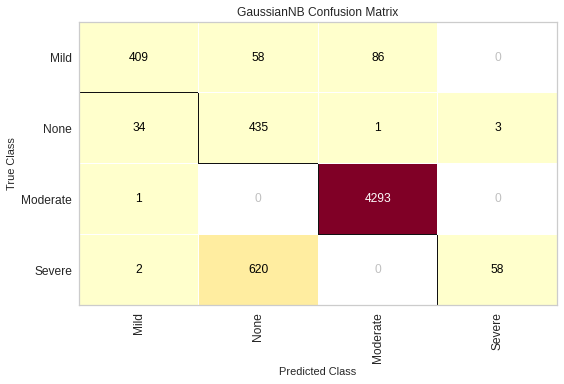

In [ ]:
cf = ConfusionMatrix(modelo, classes = ['Mild', 'None', 'Moderate', 'Severe'])
cf.fit(x_treino, y_treino)
cf.score(x_teste, y_teste)
cf.poof()